In [1]:
# import all libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
#from statsmodels.multivariate.pca import  PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:

# Replace string grades with numbers for analysis using same scale as Overall Quality/Condition
# Affects ExterQual, ExterCond,BsmtQual, BsmtCond, HeatingQC, KitchenQual, FirePlace, GarageQual/Cond, Pool Quality
# Ex = Excellent = 9
# Gd = Good = 7
# TA = Average/Typical = 5
# Fa = Fair = 3
# Po = Poor = 2
# NA = -1  
train.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [9, 7, 5, 3, 2, -1], inplace = True)

# convert 0 to np.nan since 0 is not an indicator for anything
train.replace(0, np.nan, inplace = True)
# check empty columns/data
null_array = train.isnull().sum()
null_array = null_array[null_array > 0]

train.shape, null_array

# there are 1460 rows of data, and 81 columns


((1460, 81),
 LotFrontage       259
 Alley            1369
 MasVnrType          8
 MasVnrArea        869
 BsmtQual           37
 BsmtCond           37
 BsmtExposure       38
 BsmtFinType1       37
 BsmtFinSF1        467
 BsmtFinType2       38
 BsmtFinSF2       1293
 BsmtUnfSF         118
 TotalBsmtSF        37
 Electrical          1
 2ndFlrSF          829
 LowQualFinSF     1434
 BsmtFullBath      856
 BsmtHalfBath     1378
 FullBath            9
 HalfBath          913
 BedroomAbvGr        6
 KitchenAbvGr        1
 Fireplaces        690
 FireplaceQu       690
 GarageType         81
 GarageYrBlt        81
 GarageFinish       81
 GarageCars         81
 GarageArea         81
 GarageQual         81
 GarageCond         81
 WoodDeckSF        761
 OpenPorchSF       656
 EnclosedPorch    1252
 3SsnPorch        1436
 ScreenPorch      1344
 PoolArea         1453
 PoolQC           1453
 Fence            1179
 MiscFeature      1406
 MiscVal          1408
 dtype: int64)

In [4]:
# drop by threshold (minimum valid 730 values = 50%)
train.dropna(axis = 'columns', thresh = 730, inplace = True) 

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548.0,5.0,5.0,Y,61.0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460.0,5.0,5.0,Y,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608.0,5.0,5.0,Y,42.0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642.0,5.0,5.0,Y,35.0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836.0,5.0,5.0,Y,84.0,12,2008,WD,Normal,250000


In [6]:
# Drop duplicated id column
train.drop(['Id'], axis = 1, inplace = True)

In [7]:
# drop rows missing a lot of data
train.dropna(thresh = 60, inplace = True)

# I think that YrSold and YearBuilt are important so I'm dropping any row that doesn't have them
train.dropna(subset=['YrSold', 'YearBuilt'], inplace = True)

In [8]:
train.shape

(1181, 63)

In [9]:
# replace zeros back
train.fillna(0, inplace = True)

numeric_values = train.select_dtypes(include = 'number')
numeric_values.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,7,5,7.0,...,0.0,2003.0,2.0,548.0,5.0,5.0,61.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,5,5,7.0,...,5.0,1976.0,2.0,460.0,5.0,5.0,0.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,7,5,7.0,...,5.0,2001.0,2.0,608.0,5.0,5.0,42.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,5,5,5.0,...,7.0,1998.0,3.0,642.0,5.0,5.0,35.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,7,5,7.0,...,5.0,2000.0,3.0,836.0,5.0,5.0,84.0,12,2008,250000


In [10]:
numeric_values.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.776806
GrLivArea       0.699616
ExterQual       0.666072
GarageCars      0.649928
KitchenQual     0.643539
BsmtQual        0.629691
GarageArea      0.609473
TotalBsmtSF     0.583843
1stFlrSF        0.583640
FullBath        0.555132
TotRmsAbvGrd    0.546300
YearRemodAdd    0.486521
YearBuilt       0.473131
GarageYrBlt     0.460035
FireplaceQu     0.444027
HeatingQC       0.400526
Fireplaces      0.382486
BsmtFinSF1      0.335162
OpenPorchSF     0.276236
LotArea         0.247229
BsmtUnfSF       0.210122
LotFrontage     0.199837
BedroomAbvGr    0.146087
BsmtCond        0.128966
GarageQual      0.113150
GarageCond      0.084462
MoSold          0.043854
YrSold         -0.014085
ExterCond      -0.021087
KitchenAbvGr   -0.104808
MSSubClass     -0.105587
OverallCond    -0.122286
Name: SalePrice, dtype: float64

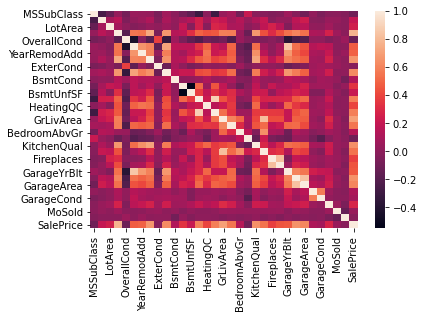

In [11]:
sns.heatmap(numeric_values.corr())

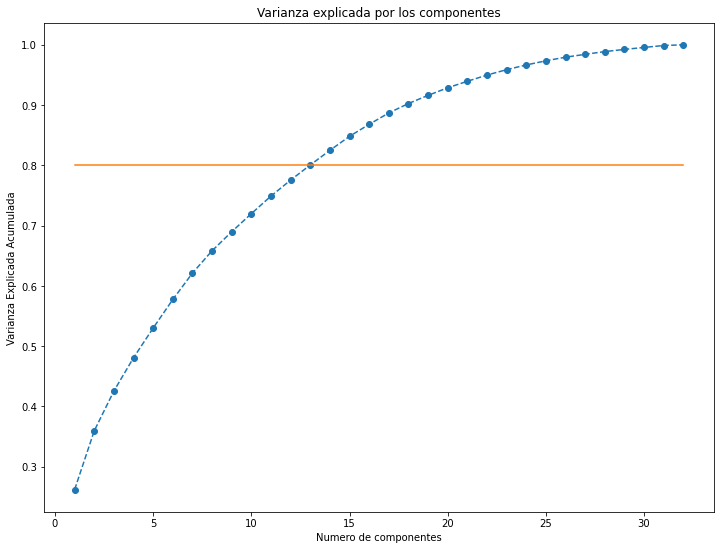

In [20]:
pca = PCA()
# We will use the numeric components to predict the Sale Price
X_train = numeric_values.drop('SalePrice', 1)
y_train = numeric_values['SalePrice']

# 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
plt.figure(figsize=(12,9))
plt.plot(range(1,33), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.plot(range(1,33), [.8]*32)
plt.title("Variance explained by components")
plt.xlabel("Number of Components")
plt.ylabel("Accumulated Variance"); #Golden Rule is greater than 80%

# 14 appears to be exactly 80% so a better number would be 15


32